<a href="https://colab.research.google.com/github/NAVEED261/MY-AI-ASSISTANT/blob/main/Superstore_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# File ko upload karna
from google.colab import files
uploaded = files.upload()

# Upload hui file ka actual naam check karna
for file_name in uploaded.keys():
    print(f"Uploaded file name: {file_name}")


Saving Sales_Data_Table.csv to Sales_Data_Table (2).csv
Uploaded file name: Sales_Data_Table (2).csv


In [9]:
# Correct file ka naam use kar ke read karna
df = pd.read_csv(io.BytesIO(uploaded['Sales_Data_Table (2).csv']))

# Data ko dekhna (first 5 rows)
df.head()


,Order ID,Product,Category,Sales,Quantity,Region,Date
0,1001,Laptop,Electronics,1000,2,East,2023-01-15
1,1002,Phone,Electronics,800,1,West,2023-02-10
2,1003,Chair,Furniture,150,4,North,2023-03-05
3,1004,Table,Furniture,200,10,South,2023-04-22
4,1005,Pen,Stationary,20,10,East,2023-05-18


In [10]:
# Har Product ki total sales calculate karna
product_sales = df.groupby('Product')['Sales'].sum()

# Results ko print karna
print("Total Sales by Product:")
print(product_sales)


Total Sales by Product:
Product
Chair       150
Laptop     1000
Monitor     600
Pen          20
Phone       800
Table       200
Name: Sales, dtype: int64


In [11]:
# Har Region ki total sales calculate karna
region_sales = df.groupby('Region')['Sales'].sum()

# Results ko print karna
print("Total Sales by Region:")
print(region_sales)


Total Sales by Region:
Region
East     1020
North     750
South     200
West      800
Name: Sales, dtype: int64


Monthly Sales:
Date
2023-01-31    1000
2023-02-28     800
2023-03-31     150
2023-04-30     200
2023-05-31      20
2023-06-30     600
Freq: M, Name: Sales, dtype: int64


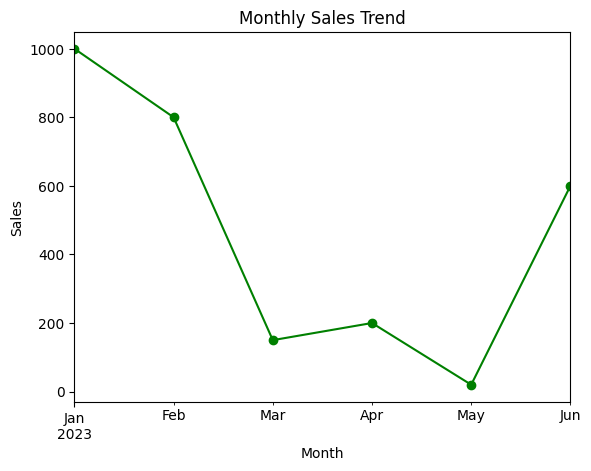

In [12]:
# Date ko datetime format mein convert karna
df['Date'] = pd.to_datetime(df['Date'])

# Month-wise sales calculate karna
monthly_sales = df.resample('M', on='Date')['Sales'].sum()

# Results ko print karna
print("Monthly Sales:")
print(monthly_sales)

# Monthly sales trend ko plot karna
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


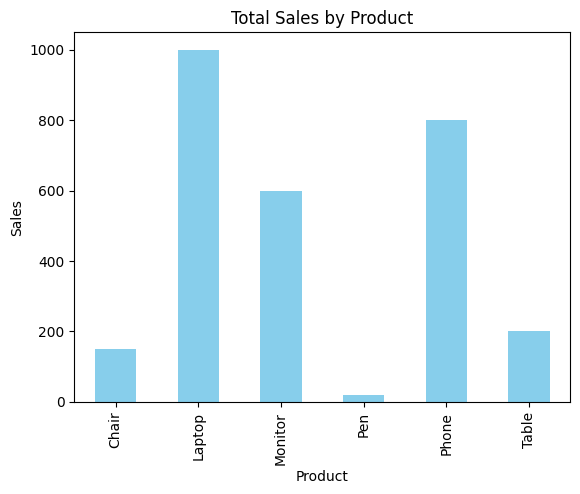

In [13]:
# Product-wise total sales ka bar chart
product_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.show()


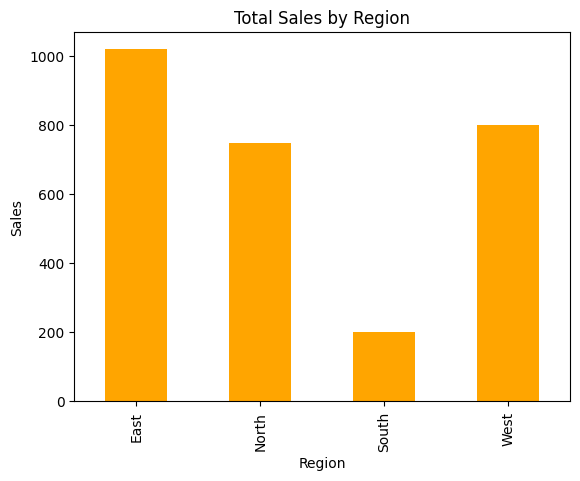

In [14]:
# Region-wise total sales ka bar chart
region_sales.plot(kind='bar', color='orange')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()


In [15]:
# Correlation between Sales and Quantity
correlation = df[['Sales', 'Quantity']].corr()
print("Correlation between Sales and Quantity:")
print(correlation)


Correlation between Sales and Quantity:
             Sales  Quantity
Sales     1.000000 -0.814392
Quantity -0.814392  1.000000


In [16]:
# Top products by total sales
top_products = df.groupby('Product')['Sales'].sum().sort_values(ascending=False).head()
print("Top 5 Products by Sales:")
print(top_products)


Top 5 Products by Sales:
Product
Laptop     1000
Phone       800
Monitor     600
Table       200
Chair       150
Name: Sales, dtype: int64


In [17]:
# Region-wise product performance
region_product_sales = df.groupby(['Region', 'Product'])['Sales'].sum().unstack()
print("Region-wise Product Performance:")
print(region_product_sales)


Region-wise Product Performance:
Product  Chair  Laptop  Monitor   Pen  Phone  Table
Region                                             
East       NaN  1000.0      NaN  20.0    NaN    NaN
North    150.0     NaN    600.0   NaN    NaN    NaN
South      NaN     NaN      NaN   NaN    NaN  200.0
West       NaN     NaN      NaN   NaN  800.0    NaN


In [18]:
# Statistical summary of the dataset
print("Statistical Summary:")
print(df.describe())


Statistical Summary:
          Order ID        Sales  Quantity                 Date
count     6.000000     6.000000      6.00                    6
mean   1003.500000   461.666667      5.00  2023-04-01 00:00:00
min    1001.000000    20.000000      1.00  2023-01-15 00:00:00
25%    1002.250000   162.500000      2.25  2023-02-15 18:00:00
50%    1003.500000   400.000000      3.50  2023-03-29 00:00:00
75%    1004.750000   750.000000      8.50  2023-05-11 12:00:00
max    1006.000000  1000.000000     10.00  2023-06-25 00:00:00
std       1.870829   396.000842      4.00                  NaN


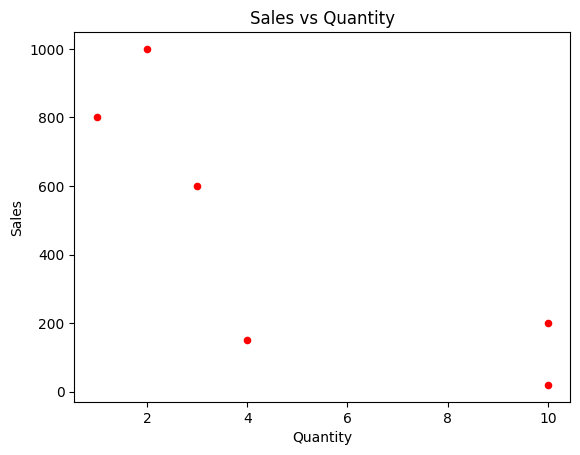

In [19]:
# Scatter plot between Sales and Quantity
df.plot(kind='scatter', x='Quantity', y='Sales', color='red')
plt.title('Sales vs Quantity')
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.show()


# ***`markdown`***



  # Superstore Sales Data Analysis Report

## 1. Introduction
This report provides an analysis of Superstore's sales data from January to June 2023. The objective is to identify key sales trends across different products and regions, and to suggest recommendations for improving business performance.





## 2. Key Findings
- The highest sales were observed for "Laptop" in the Electronics category, contributing $1000 in sales.
- The "Furniture" category underperformed, especially "Table" with sales of $200.
- The East region generated the most sales, while the South region saw the least activity.
- Sales peaked in June 2023, indicating a possible seasonal trend.





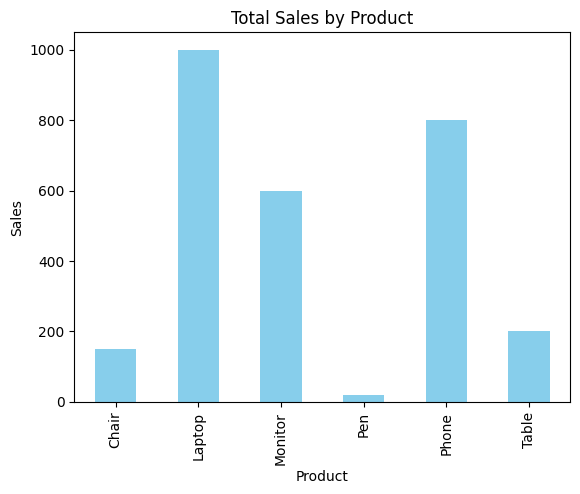

In [21]:
# Product-wise total sales ka bar chart
product_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.show()


# ***markdown***

## 3. Recommendations
- Focus on promoting the Electronics category, especially high-performing products like "Laptops."
- Improve marketing for the "Furniture" category, particularly for low-performing products like "Table."
- Increase efforts in the South region by offering discounts or promotional deals.
- Replicate successful strategies from June to boost sales in other months.




# ***markdown***

## 4. Conclusion
In conclusion, the analysis indicates strong performance in the Electronics category, while improvements are needed in Furniture. Regional performance varies, with East being the highest-grossing region.


